This project demonstrates the application of the CRISP-DM (Cross Industry Standard Process for Data Mining) framework to analyze [Airbnb rental prices in Boston](https://www.kaggle.com/datasets/airbnb/boston/data). Using data from the Boston Airbnb dataset on Kaggle, the aim is to systematically approach a data mining project, from understanding the business problem to deploying a model. By understanding the factors that influence Airbnb rental prices, hosts can optimize their listings and maximize revenue.

# I.Business Understanding

**"Successful people ask better questions, and as a result, they get better answers" - Tony Robins**

Define your target audience and research a problem that you are interested in studying! For this project, we chose to help AirBnb owners understand what prices they should charge guests and what variables could help them understand this. So let's think about some questions they might have.

### Questions - I own an AirBnb and I have some questions...
.What is the average price per square meter?

.What is the distribution of property types?

.What are the most expensive and cheapest areas in the city?

.Which characteristic is most related to the price of the place?

# II.Data Understanding

In this phase, data is collected and explored to understand its characteristics and quality. This step often involves initial data collection, data description, data exploration, and the verification of data quality.

## Import Data

In [1]:
import math
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time

%matplotlib inline

### AirBnb Dataset content
#### The DataSet contain 3 csv documents:
- Listings.csv: including full descriptions and average review score
- Reviews.csv: including unique id for each reviewer and detailed comments
- calendar.csv: including listing id and the price and availability for that day

Looking at our questions, we want to focus only on the characteristics that involve homestays, so we just need to import file Listings.csv
Feel free to try other files in the original repository.

In [2]:
# Read file
df_lis = pd.read_csv(r'dataset/listings.csv')

In [3]:
# Set display options to show all rows – This is my preference, but be careful with large amounts of data
# pd.set_option('display.max_rows', None)

# Reset display options to default
pd.reset_option('display.max_rows')

In [4]:
# First things, First. You can use this commands to help you undesrtand the data
# Run one by one with you want to:
df_lis.shape # What is the format of the data?
df_lis.columns # What are the column names?
df_lis.dtypes # What are data types?
df_lis.info() # All the previous questions and more
df_lis.head() # What the first rows of the data looks like?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


## Creating a data dictionary
Since there is no data dictionary in the original link, I like to start this type of project by creating my own just to help me with the process.

You'll see that we can do a lot of transformations with our data, but for now it's good to just label it in a way that makes sense to you.

For example, I will create a data dictionary with the original column names as an index and label them into types (object, integers, floats,...) and categories (Houst, Reviews,...) based on what I saw it in the precious code.

In [5]:
#I created the following types and categories:
#(This is how I understood the data. You can see other categories or different types from me)
inicital_types = list(set(df_lis.dtypes.values))
types = ['object','Date','List/Dict','Number','bool']
categories = ['Id_url','Propite_basic_information','Houst','Location','Residence','Price','Rules','availability','review','Others']

#Nice! Now we create a Data Frame that has an 'original_type', 'suggest_type', 'ategory' of the columns we are working with.

#TIP: This is the kind of work your AI can help you with, just because it can be repetitive.

column_mapping = {
    # Identification information
    'id': ('object', 'Identification'),
    'listing_url': ('object', 'Identification'),
    'scrape_id': ('object', 'Identification'),
    'thumbnail_url': ('object', 'Identification'),
    'medium_url': ('object', 'Identification'),
    'picture_url': ('object', 'Identification'),
    'xl_picture_url': ('object', 'Identification'),
    'host_id': ('object', 'Identification'),
    'host_url': ('object', 'Identification'),
    'host_thumbnail_url': ('object', 'Identification'),
    'host_picture_url': ('object', 'Identification'),
    # Dates
    'last_scraped': ('date', 'Dates'),
    # Basic Property 'object' information
    'name': ('object', 'Property'),
    'summary': ('object', 'Property'),
    'space': ('object', 'Property'),
    'description': ('object', 'Property'),
    'experiences_offered': ('object', 'Property'),
    'neighborhood_overview': ('object', 'Property'),
    'notes': ('object', 'Property'),
    'transit': ('object', 'Property'),
    'access': ('object', 'Property'),
    'interaction': ('object', 'Property'),
    'house_rules': ('object', 'Property'),
    # Host 'object' information
    'host_name': ('object', 'Host'),
    'host_location': ('object', 'Host'),
    'host_about': ('object', 'Host'),
    'host_response_time': ('object', 'Host'),
    'host_neighbourhood': ('object', 'Host'),
    # Host List/Dict information
    'host_verifications': ('list/dict', 'Host'), #Text that wiil become new columns (list)
    # Host date information
    'host_since': ('date', 'Host'),
    # Host number information
    'host_response_rate': ('float64', 'Host'),
    'host_response_rate': ('float64', 'Host'),
    'host_acceptance_rate': ('float64', 'Host'),
    'host_listings_count': ('int64', 'Host'),
    'host_total_listings_count': ('int64', 'Host'),
    # Host Boolean information
    'host_is_superhost': ('bool', 'Host'),
    'host_has_profile_pic': ('bool', 'Host'),
    'host_identity_verified': ('bool', 'Host'),
    # Location 'object' information
    'street': ('object', 'Location'),
    'neighbourhood': ('object', 'Location'),
    'neighbourhood_cleansed': ('object', 'Location'),
    'neighbourhood_group_cleansed': ('object', 'Location'),
    'city': ('object', 'Location'),
    'state': ('object', 'Location'),
    'zipcode': ('object', 'Location'),
    'market': ('object', 'Location'),
    'smart_location': ('object', 'Location'),
    'country_code': ('object', 'Location'),
    'country': ('object', 'Location'),
    # Location Number information
    'latitude': ('float64', 'Location'),
    'longitude': ('float64', 'Location'),
    # Location Boolean information
    'is_location_exact': ('bool', 'Location'),
    # Residence 'object' information
    'property_type': ('object', 'Residence'),
    'room_type': ('object', 'Residence'),
    'bed_type': ('object', 'Residence'),
    # Residence List/Dict information
    'amenities': ('list/dict', 'Residence'),
    # Residence Number information
    'accommodates': ('int64', 'Residence'),
    'bathrooms': ('int64', 'Residence'),
    'bedrooms': ('int64', 'Residence'),
    'beds': ('int64', 'Residence'),
    'square_feet': ('float64', 'Residence'),
    # Price Number information
    'price': ('float64', 'Price'),
    'weekly_price': ('float64', 'Price'),
    'monthly_price': ('float64', 'Price'),
    'security_deposit': ('float64', 'Price'),
    'cleaning_fee': ('float64', 'Price'),
    'extra_people': ('float64', 'Price'),
    # Rules 'object' information
    'cancellation_policy': ('object', 'Rules'),
    # Rules Number information
    'guests_included': ('int64', 'Rules'),
    'minimum_nights': ('int64', 'Rules'),
    'maximum_nights': ('int64', 'Rules'),
    # Rules Boolean information
    'require_guest_profile_picture': ('bool', 'Rules'),
    'require_guest_phone_verification': ('bool', 'Rules'),
    # Others
    'calendar_updated': ('others', 'object'),
    'calendar_last_scraped': ('date', 'Others'),
    'calculated_host_listings_count': ('int64', 'Others'),
    'requires_license': ('bool', 'Others'),
    'license': ('bool', 'Others'),
    'instant_bookable': ('bool', 'Others'),
    # Availability information
    'has_availability': ('int64', 'Availability'),
    'availability_30': ('int64', 'Availability'),
    'availability_60': ('int64', 'Availability'),
    'availability_90': ('int64', 'Availability'),
    'availability_365': ('int64', 'Availability'),
    # Review Object information
    'jurisdiction_names': ('object', 'Review'),
    # Review Number information
    'number_of_reviews': ('int64', 'Review'),
    'review_scores_rating': ('float64', 'Review'),
    'review_scores_accuracy': ('float64', 'Review'),
    'review_scores_cleanliness': ('float64', 'Review'),
    'review_scores_checkin': ('float64', 'Review'),
    'review_scores_communication': ('float64', 'Review'),
    'review_scores_location': ('float64', 'Review'),
    'review_scores_value': ('float64', 'Review'),
    'reviews_per_month': ('float64', 'Review'),
    # Review Date information
    'first_review': ('int64', 'Review'),
    'last_review': ('int64', 'Review')
}

# Initialize an empty DataFrame
data_dictionary = pd.DataFrame(columns=['original_type', 'suggest_type', 'category'])

# Iterate over each column in dict_columns
for col, (suggest_type, category) in column_mapping.items():
    original_type = df_lis[col].dtype
    # Append the information to the data dictionary DataFrame
    data_dictionary.loc[col] = [original_type, suggest_type, category]

In [6]:
#let's check what this DataFrame looks like. For example, I want to see what the Review Category column labels look like...
data_dictionary[data_dictionary.category == 'Review']

,original_type,suggest_type,category
jurisdiction_names,float64,object,Review
number_of_reviews,int64,int64,Review
review_scores_rating,float64,float64,Review
review_scores_accuracy,float64,float64,Review
review_scores_cleanliness,float64,float64,Review
review_scores_checkin,float64,float64,Review
review_scores_communication,float64,float64,Review
review_scores_location,float64,float64,Review
review_scores_value,float64,float64,Review
reviews_per_month,float64,float64,Review


looks like we may need to change some columns types in the future. But lets continue our analysis

## Some Exploratory Data Analysis

Part of the process of understanding data is understanding how it is distributed. We call this Exploratory Data Analysis (EDA), as we apply statistics with techniques that use fundamentals of Descriptive Statistics, involving the organization, summary and presentation of data that describe the characteristics of the data

with mean, we can better estimate where the center of the data is. As for the standard deviation (std), 'min', '25%', '50%', '75%' and 'max' we llok for the variability.

In [7]:
#Let's look at some of the most basic estimates for our data
df_lis.describe().T # I use .T to transpose the table for easier viewing

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,8.516813e-01,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


### Important observation
It is always important to seek to understand the data, but especially those that have the greatest impact on our questions.

In the description table we can already see that our first question "What is the average price per square meter?" It probably no longer makes sense to be used. Note that out of 3585 rows, the 'square_feet' column has only 56, that is, only 2% of the cases.

I don't know about you, but I think this is a very small value to describe the cases we analyzed. 

If we pay attention to details like this, we can save a lot of our time on more complex steps.

### Moving on
Numbers can be a bit difficult to understand, so I like to present some graphs as well to support me. Lets look how some of our data looks like... (I encourage you to do some chart analysis, but I won't go into detail at this point) 

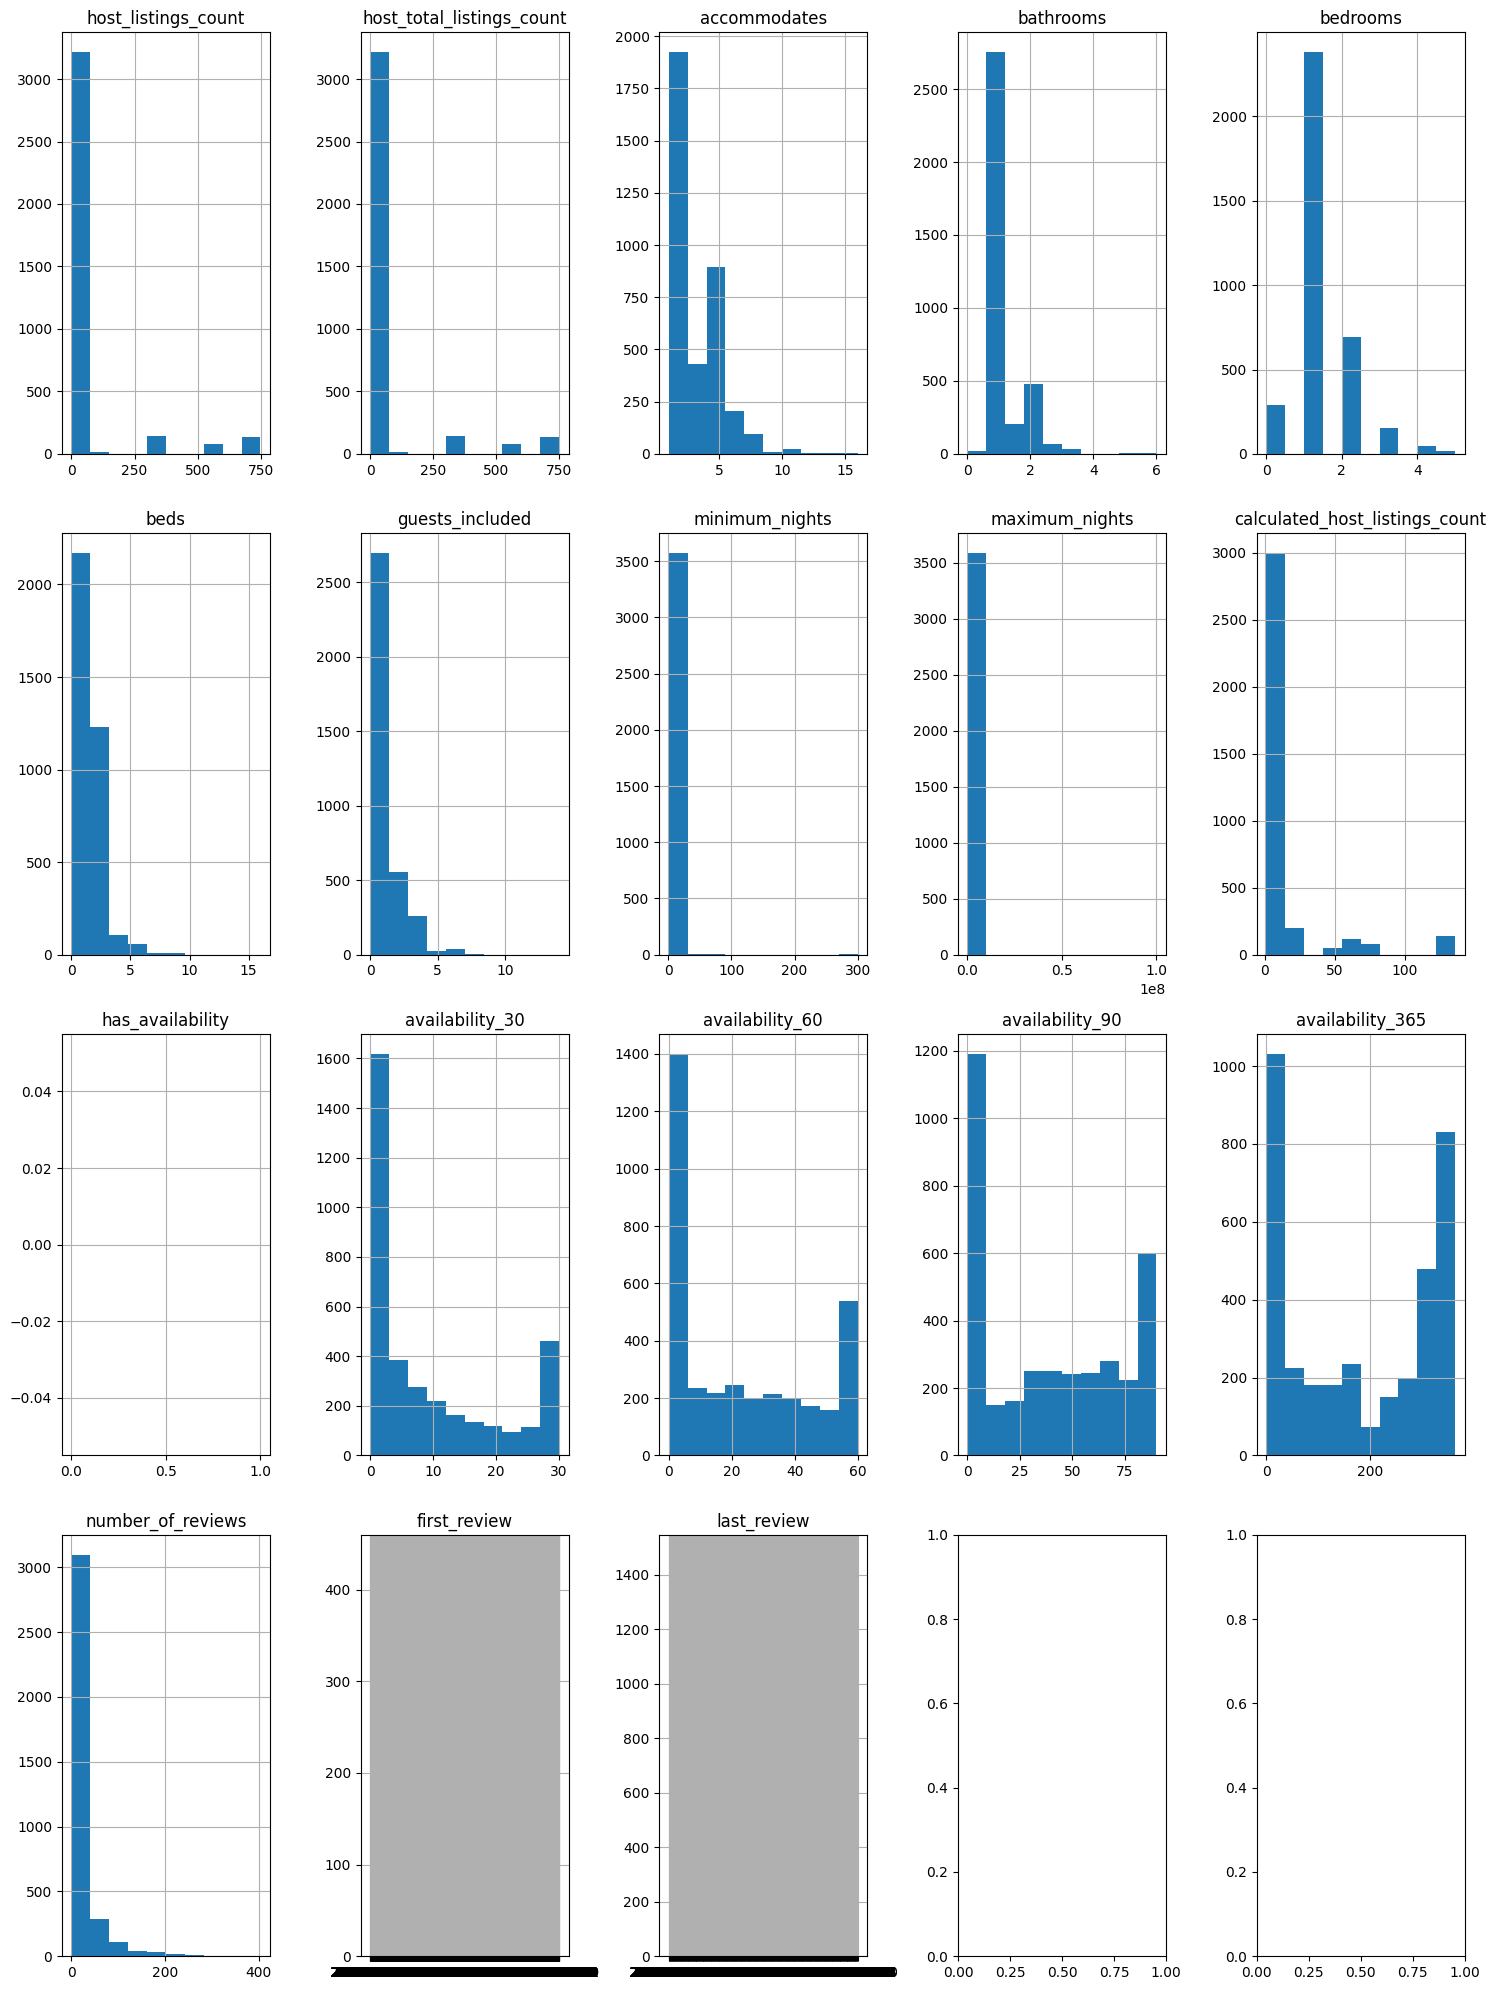

In [8]:
#Only columns with intergers base o the data dictionary suggest type
int_columns = data_dictionary[(data_dictionary.suggest_type == 'int64')].index

# Set the layout for subplots
num_plots = len(int_columns)
num_cols = 5  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Plot histograms for each integer column
for i, column in enumerate(int_columns):
    df_lis[column].hist(ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

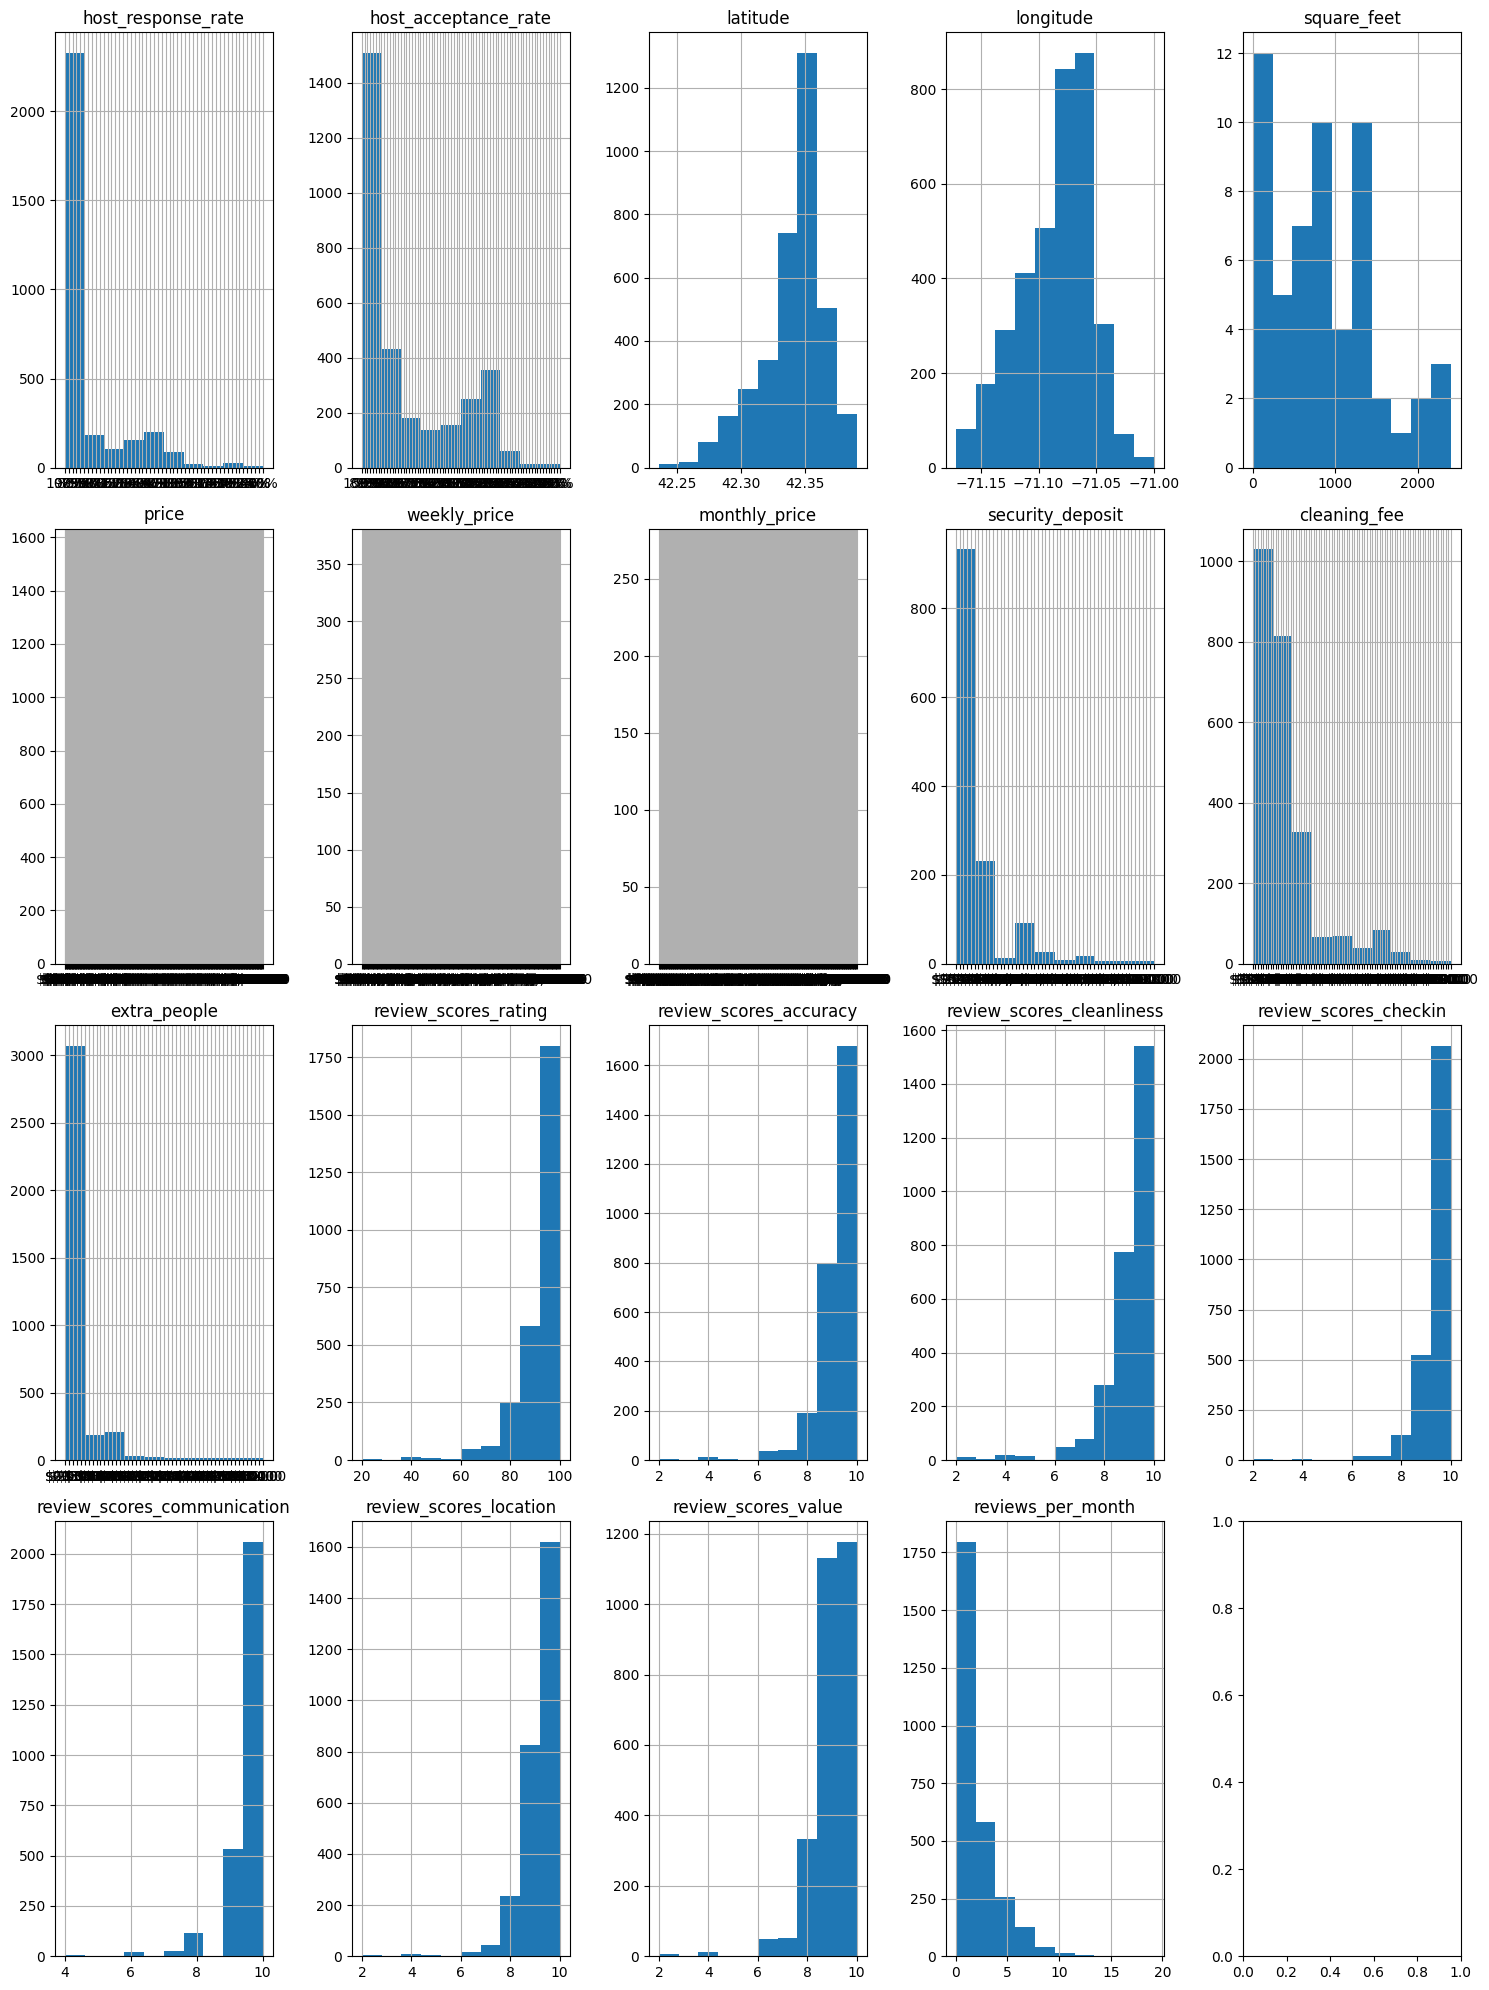

In [9]:
#Only columns with float base o the data dictionary suggest type
float_columns = data_dictionary[(data_dictionary.suggest_type == 'float64')].index

# Set the layout for subplots
num_plots = len(float_columns)
num_cols = 5  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Plot histograms for each float column
for i, column in enumerate(float_columns):
    df_lis[column].hist(ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# III.Data Preparation

This phase covers all activities needed to construct the final dataset from the initial raw data. Tasks include data cleaning, data transformation, feature selection, and creating the data formats necessary for the modeling tools

## Summary of Data Preprocessing Steps

In [10]:
# Using a copy of the original dataframe helps us make changes to our data 
# without having to re-import the information every time necessary.
df_lis_format = df_lis.copy()

In [11]:
#We dont need columns with no variation (constant columns) - do not provide any new information between different rows
no_variation = list(df_lis_format.loc[:, df_lis_format.nunique() == 1].columns) #look for columns with only one unique data
df_lis_format = df_lis_format.drop(columns=no_variation) #drop this columns

In [12]:
#The first thing i like to look for is nan values
count_nan = df_lis_format.isna().sum()
total = df_lis_format.shape[0]
my_format = lambda x: '{:.3f}'.format(x)

nan_percentage = (count_nan/total).map(my_format).sort_values(ascending=False)

#As we can see, 44 columns have nan values. We have to deal with then before we can make more changes
nan_percentage = pd.to_numeric(nan_percentage)
nan_percentage = nan_percentage[nan_percentage>0]
nan_percentage.shape[0]

44

With Nan values, we could simply eliminate them, but that could mean we are losing valuable information! (The fact that a row does not have information can be information in itself).

To deal with missing values in these columns, it's best to follow a systematic approach:

**1.Identify the importance of each column:** Determine the significance of each column for your analysis. Some columns may be critical for your analysis, while others may be less important.

**2.Choose appropriate imputation strategies:** Select imputation strategies based on the nature of the data in each column and its importance for analysis. For example, numerical columns may be imputed with mean or median values, while categorical columns may be imputed with mode values or a placeholder indicating missing data.

**3.Implement imputation:** Apply the chosen imputation strategies to fill in missing values for each column.

**4.Verify the results:** After imputation, verify that missing values have been appropriately filled and that the dataset is ready for further analysis.

In [13]:
#lets Drop columns with almost no variation (95% NaN)
##Obs:Nan values may mean something, but if all or almost all the values are nan in a column, why would that make any difference?
nan_percentage_95 = nan_percentage[nan_percentage >= 0.9]
nan_percentage_95_c = nan_percentage_95.index
df_lis_format.drop(columns=nan_percentage_95_c, inplace=True)

In [14]:
#We took some of those columns, but we must keep going. Lets see how many continue to have Nan values
nan_percentage = nan_percentage[nan_percentage<0.95]
nan_percentage.shape[0]

39

### Deal with nan

For the next steps, I filled in the nan values using a few different techniques. I won't go into details for now, but this part might help you understand my code. You can see the techniques and changed columns:

1. **Drop Columns** (no significance for our analysis):
   - Dropped 'monthly_price', 'weekly_price', and 'security_deposit' columns.
   

2. **Convert NaN to Measures of Center:**
   - Converted NaN values in 'review_scores_accuracy', 'review_scores_location', 'review_scores_value', 'review_scores_checkin', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month', 'host_response_rate', and 'host_acceptance_rate' columns to their respective measures of center (median or mode).
   

3. **Convert to Binary:**
   - Converted specified columns to binary format (1 if has notes and 0 if not).'notes', 'interaction', 'access', 'neighborhood_overview', 'host_about', 'transit', 'house_rules', 'space', 'xl_picture_url', 'medium_url', 'thumbnail_url', 'summary'
   

4. **Convert NaN to 0s:**
   - Converted NaN values to 0s in 'cleaning_fee', 'zipcode', 'bathrooms', 'market', 'bedrooms', 'beds', 'medium_url', and 'thumbnail_url' columns.


5. **Convert NaN to Specific Values:**
   - Converted NaN values to specific values in 'neighbourhood', 'host_response_time', 'host_neighbourhood', 'host_location', 'city', and 'property_type' columns.
   

6. **Corrected Date Columns:**
   - Corrected 'first_review' and 'last_review' columns by converting NaN to 0, converting to date, and calculating the number of days passed since today.


In [15]:
#Drop Columns that we dont need for our questions.
columns_to_drop = ['monthly_price', 'weekly_price', 'security_deposit']
df_lis_format.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Fill NaN values in 'reviews_per_month' columns with median
df_lis_format['reviews_per_month'].fillna(df_lis_format['reviews_per_month'].median(), inplace=True)

# Fill NaN values in review score columns with mode
review_score_columns = ['review_scores_accuracy', 'review_scores_location', 'review_scores_value',
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_cleanliness',
                        'review_scores_rating','host_response_rate','host_acceptance_rate']

for col in review_score_columns:
    df_lis_format[col].fillna(df_lis_format[col].mode()[0], inplace=True)

In [17]:
# List of columns to convert to binary
binary_columns = ['notes', 'interaction', 'access', 'neighborhood_overview', 'host_about', 'transit', 
                  'house_rules', 'space', 'xl_picture_url', 'medium_url', 'thumbnail_url', 'summary']

# Convert specified columns to binary: 1 if has notes and 0 if not
for col in binary_columns:
    df_lis_format[col] = df_lis_format[col].notnull().astype(bool)

In [18]:
# Input specific values for NaN in cleaning_fee, first_review, last_review, zipcode, bathrooms, market, and bedrooms columns
columns_to_fill = {
    'cleaning_fee': '$0.00',
    'zipcode': 0,
    'beds':0,
    'bathrooms': 0,
    'market': 0,
    'bedrooms': 0
}

for col, value in columns_to_fill.items():
    df_lis_format[col].fillna(value, inplace=True)

In [19]:
# Convert NaN to specific values in neighbourhood, host_response_time, host_neighbourhood, host_location, city, and property_type columns
columns_to_fill = {
    'neighbourhood': 'not provided',
    'host_response_time': 'not provided',
    'host_neighbourhood': 'not provided',
    'host_location': 'not provided',
    'city': 'not provided',
    'property_type': 'not provided'
}

for col, value in columns_to_fill.items():
    df_lis_format[col].fillna(value, inplace=True)

In [20]:
# Convert NaN to 0 for 'first_review' and 'last_review' columns
df_lis_format['first_review'].fillna(0, inplace=True)
df_lis_format['last_review'].fillna(0, inplace=True)

# Convert to date for 'first_review' and 'last_review' columns
df_lis_format['first_review'] = pd.to_datetime(df_lis_format['first_review'], errors='coerce')
df_lis_format['last_review'] = pd.to_datetime(df_lis_format['last_review'], errors='coerce')

# Calculate number of days passed since today for 'first_review' and 'last_review' columns
today = pd.to_datetime(datetime.now().date())
df_lis_format['first_review'] = (today - df_lis_format['first_review']).dt.days
df_lis_format['last_review'] = (today - df_lis_format['last_review']).dt.days

#correct data_dictionary
data_dictionary.loc[['first_review','last_review'], 'original_type'] = 'int64' 

In [21]:
#Lets Verify the results!! It should result as Zero!
count_nan = df_lis_format.isna().sum().sum()
count_nan

0

## Format Data

Formatting data refers to the process of transforming raw data into a structured, consistent, and easily understandable form suitable for analysis, visualization, or further processing

Lets change some of our data format...

In [22]:
#What are the formats types?
df_lis_format.dtypes.value_counts()

object     38
int64      16
float64    13
bool       12
dtype: int64

In [23]:
data_dictionary.loc[:]

,original_type,suggest_type,category
id,int64,object,Identification
listing_url,object,object,Identification
scrape_id,int64,object,Identification
thumbnail_url,object,object,Identification
medium_url,object,object,Identification
...,...,...,...
review_scores_location,float64,float64,Review
review_scores_value,float64,float64,Review
reviews_per_month,float64,float64,Review
first_review,int64,int64,Review


In [24]:
def convert_data_types(df, data_dict):
    """
    Convert data types of DataFrame columns based on the suggestions in the data dictionary.

    Parameters:
    - df: DataFrame - The DataFrame to be modified.
    - data_dict: DataFrame - The data dictionary containing suggestions for data types.

    Returns:
    - df: DataFrame - The modified DataFrame with updated data types.
    """

    for column, row in data_dict.iterrows():
        try:
            if column in df_lis_format.columns:
                suggested_type = row['suggest_type']
                original_type =  row['original_type']
                if original_type != suggested_type:
                    if suggested_type == 'object':
                        df[column] = df[column].astype(suggested_type)
                    if suggested_type == 'date':
                        df[column] = pd.to_datetime(df[column])
                    elif suggested_type == 'bool':
                        df[column] = df[column].map({'t': 1, 'f': 0})  # Assuming 't' and 'f' represent True and False
                    elif suggested_type == 'float64':
                        df[column] = df[column].str.replace('%', '', regex=False)\
                                               .str.replace('$', '', regex=False)\
                                               .str.replace(',', '', regex=False)\
                                               .astype(float)  # Remove special characters and convert to float
                    elif suggested_type == 'int64':
                        try:
                            df[column] = df[column].str.replace('%', '', regex=False)\
                                                   .str.replace('$', '', regex=False)\
                                                   .str.replace(',', '', regex=False)\
                                                   .astype(int)  # Remove special characters and convert
                        except:
                            df[column] = df[column].apply(math.ceil).astype(int) #When trying to convert float to int
                    else:
                        pass # Handle other cases based on your specific requirements

                    # Update the original_type in data_dictionary
                    data_dict.at[column, 'original_type'] = df[column].dtype.name
        except Exception as e:
            print(f"Error converting column '{column}': {e}")
    
    #Correct the index of data_dictionary to only have the same columns as in teh dataframe
    data_dict = data_dict.loc[df.columns,:]
    
    return df, data_dict

df_lis_format, data_dictionary = convert_data_types(df_lis_format, data_dictionary)

In [25]:
#Lets see how are data dictionarys "original type" and "suggest type" look like now
data_dictionary

,original_type,suggest_type,category
id,object,object,Identification
listing_url,object,object,Identification
name,object,object,Property
summary,object,object,Property
space,object,object,Property
...,...,...,...
cancellation_policy,object,object,Rules
require_guest_profile_picture,int64,bool,Rules
require_guest_phone_verification,int64,bool,Rules
calculated_host_listings_count,int64,int64,Others


# IV.Modeling and Evaluation

During modeling, various modeling techniques are selected and applied to the prepared dataset. This phase generally involves selecting appropriate algorithms, tuning model parameters, and evaluating model performance.

As there are hundreds of different types of models of various types of complexity, the idea here is to make this part as simple as possible, so as not to lose the main focus, which is to show how the CRISP-DM framework works. However, you can follow other projects of mine with models of different complexities on [my github](https://github.com/danielsbraga).

# Answer questions
.~What is the average price per square meter?~ (As we saw before, this question is no longer valid due to lack of data)

.What is the distribution of property types?

.What are the most expensive and cheapest areas in the city?

.Which characteristics are most related to the price of the place? (What price should I put on my property?)

In [26]:
#Again, we copy the previous DataFrame
df_lis_ans = df_lis_format.copy()

## 1.What is the distribution of property types?

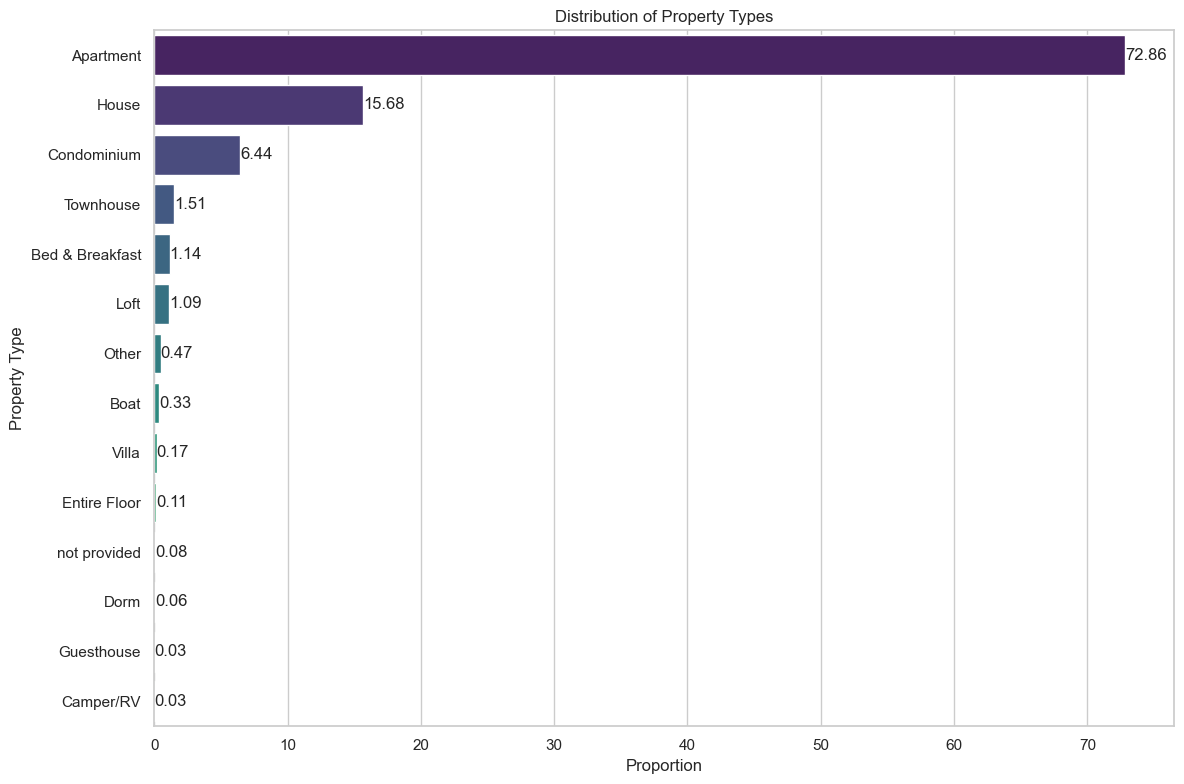

In [27]:
# Calculate the proportion of each property type
property_type_distribution = df_lis_ans['property_type'].value_counts(normalize=True)*100

# Set the style of seaborn
sns.set(style="whitegrid")

## Plotting bar plot for property type distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=property_type_distribution.values, y=property_type_distribution.index, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Proportion')
plt.ylabel('Property Type')

# Annotate each bar with its corresponding proportion
for index, value in enumerate(property_type_distribution.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')  # Adjusted text position

plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/bar_chart_distribution_property_types_full.png', transparent=False, bbox_inches='tight')

plt.show()

In [28]:
#'Apartment', 'House', 'Condominium' represent over 90% of all the property types 
property_type_distribution.iloc[0:3].sum()

94.97907949790795

In [29]:
#Beside 'Apartment', 'House', 'Condominium',the rest of property types will be called 'others'
df_lis_ans.loc[~df_lis_ans['property_type'].isin(['Apartment', 'House', 'Condominium']), 'property_type'] = 'Others'

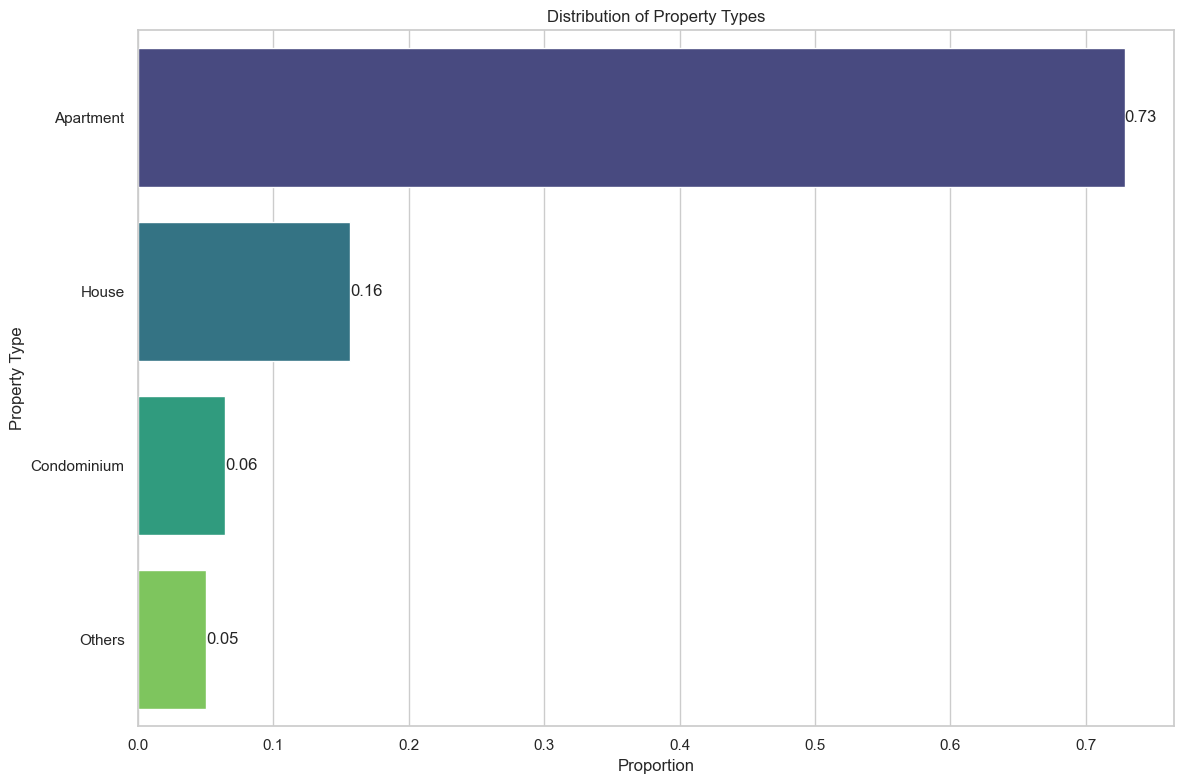

In [30]:
# Calculate the proportion of each property type
property_type_distribution = df_lis_ans['property_type'].value_counts(normalize=True)

# Plotting bar plot for property type distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=property_type_distribution.values, y=property_type_distribution.index, palette='viridis', saturation=0.8)  # Adjust saturation level
plt.title('Distribution of Property Types')
plt.xlabel('Proportion')
plt.ylabel('Property Type')

# Annotate each bar with its corresponding proportion
for index, value in enumerate(property_type_distribution.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')  # Adjusted text position

plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/bar_chart_distribution_property_types_summary.png', transparent=False, bbox_inches='tight')

plt.show()

### Important observation
Sometimes, we may find some data that is very discrepant from the median (center) of our data set. This means they can give a false impression that something is much bigger or much smaller than it is. These are the so-called [outliers](https://www.youtube.com/watch?v=vcbMinm_1Q8&t=1s)

In our case, as we are working with house prices, some places that have very small or very large values can confuse our analysis of the reality of most cases. Therefore, some techniques can be used such as [IQR (interquartile range)](https://www.youtube.com/watch?v=qLYYHWYr8xI) used in the **remove_outliers function** below.

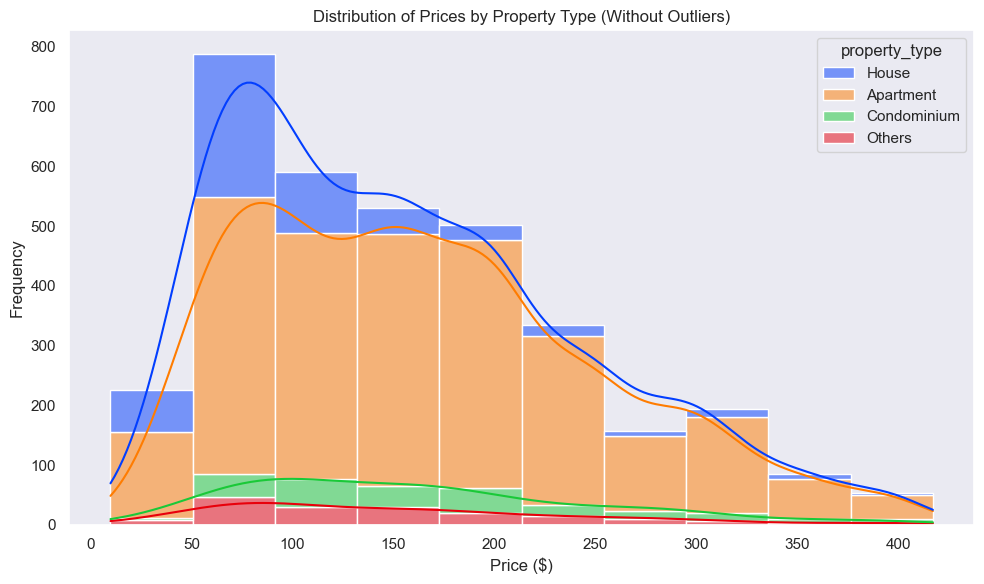

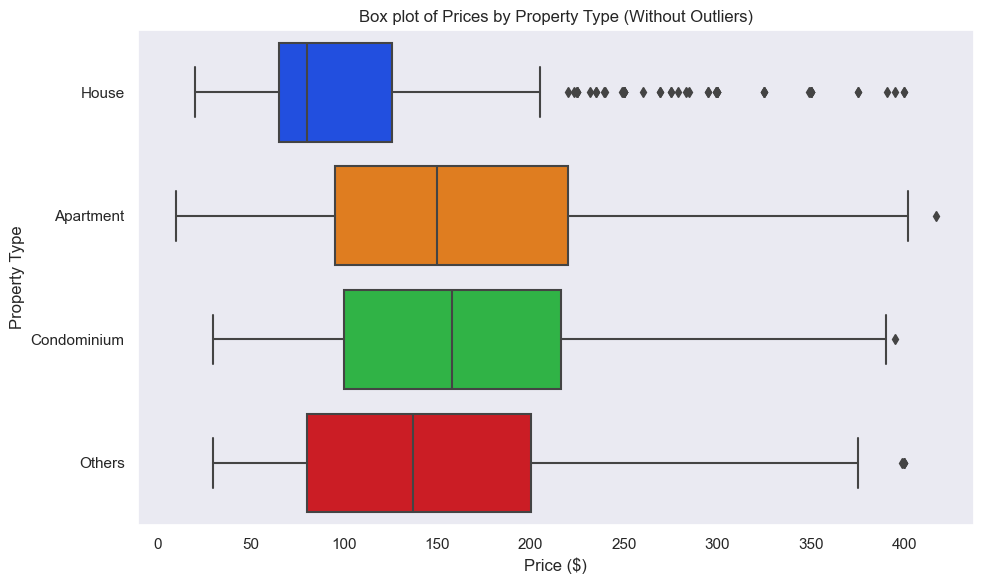

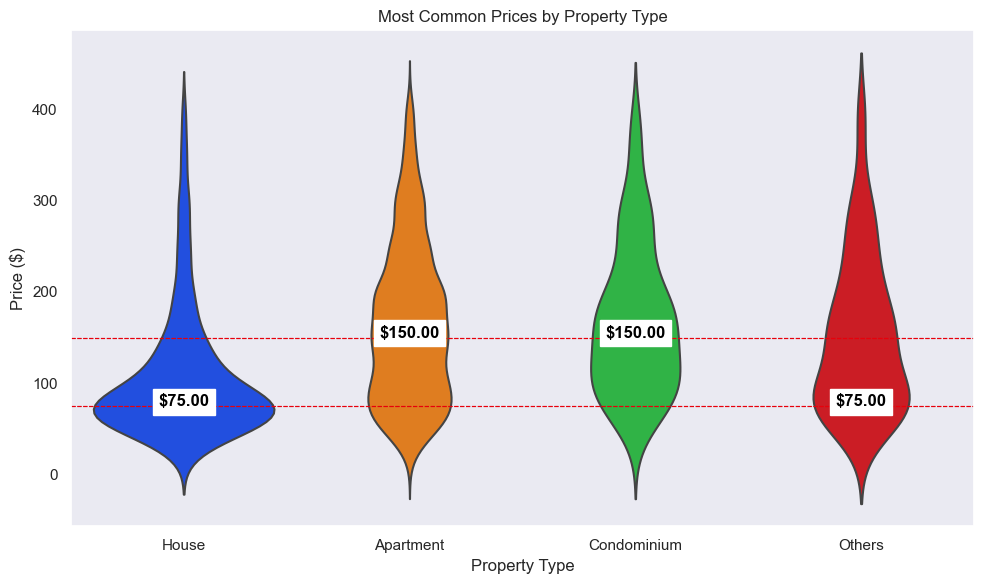

In [31]:
# Function to remove outliers based on IQR
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from price column
df_no_outliers = remove_outliers(df_lis_ans, 'price') #This will drop only 5% of the data rows

# Set the style of seaborn
sns.set("notebook", style="dark", palette='bright')

###

# Plotting histogram without outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x='price', hue='property_type', kde=True, bins=10, legend=True, multiple="stack")
plt.title('Distribution of Prices by Property Type (Without Outliers)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/hist_of_prices_by_property_type.png', transparent=False, bbox_inches='tight')

plt.show()

####

# Plotting box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, y='property_type', x='price')
plt.title('Box plot of Prices by Property Type (Without Outliers)')
plt.xlabel('Price ($)')
plt.ylabel('Property Type')
plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/box_plot_of_prices_by_property_type.png', transparent=False, bbox_inches='tight')

plt.show()

####

# Function to calculate the mode; if there are multiple modes, it returns the first one
def calculate_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return mode_value[0]
    else:
        return None

# Calculate mode for each property type
modes = df_no_outliers.groupby('property_type')['price'].apply(calculate_mode)
property_types = df_no_outliers['property_type'].unique()

# Plotting violin plot without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_no_outliers, x='property_type', y='price', inner=None)

# Adding mode annotations and lines
for idx, property_type in enumerate(property_types):
    mode_val = modes[property_type]
    plt.axhline(mode_val, color='r', linestyle='--', linewidth=0.8)
    plt.text(idx, mode_val, f'${mode_val:.2f}', 
             horizontalalignment='center', size='medium', color='black', weight='semibold', backgroundcolor='white')

plt.title('Most Common Prices by Property Type')
plt.ylabel('Price ($)')
plt.xlabel('Property Type')
plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/violin_of_prices_by_property_type.png', transparent=False, bbox_inches='tight')

plt.show()

In [32]:
# Calculate quartiles
property_quartiles = df_no_outliers.groupby('property_type')['price'].describe()[['25%', '50%', '75%']]
property_quartiles

,25%,50%,75%
property_type,,,
Apartment,95.0,150.0,220.0
Condominium,100.0,158.0,216.0
House,65.0,80.0,125.5
Others,80.0,137.0,200.0


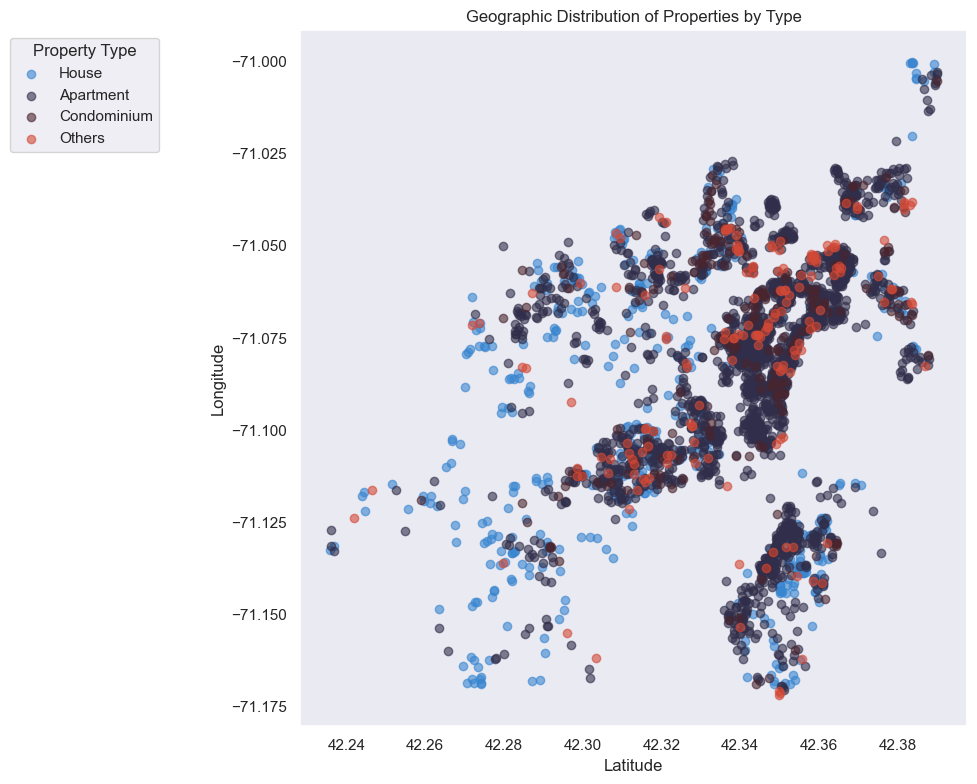

In [33]:
# Define a color palette for each property type
palette = sns.color_palette("icefire", len(property_types))
color_map = {property_type: palette[i] for i, property_type in enumerate(property_types)}

# Create a scatter plot
plt.figure(figsize=(10, 8))
for property_type in property_types:
    subset = df_no_outliers[df_no_outliers['property_type'] == property_type]
    plt.scatter(subset['latitude'], subset['longitude'], color=color_map[property_type], label=property_type, alpha=0.6)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution of Properties by Type')

# Adjust the legend to avoid overlay
plt.legend(title='Property Type', bbox_to_anchor=(-0.2, 1), loc='upper right')
plt.subplots_adjust(left=0.2)  # Adjust the subplot to the right to make space for the legend

plt.tight_layout()

# if you want to save the figure
plt.savefig('plots/scatter_plot_by_property_type.png', transparent=False, bbox_inches='tight')

plt.show()

#### Analysis:
- **Apartment, House, Condominium represent more than 90% of all types of properties**, with Apartments being the most common type representing more than 70% of the locations analyzed.
- Both graphical and statistical analyses show that prices typically range from `$65` to `$220`. However, there is notable variability depending on the property type.
- Houses have the lowest median, but it is possible to find many cases far from the expected median. They also are the less distributed type. Most of values are concetrade in `$75`.
- Considering we only have the information about the type property, for property owners unsure about pricing, the following guidelines based on quartile analysis can be useful starting points:
    - **Apartments**: Set the price at around `$150`, or within a flexible range of `$95` to `$220`. This range accounts for the majority of market pricing and can help position the property competitively.
    - **Condominiums**: Consider a price point near `$158`, or within `$100` to `$216`. This reflects the typical market range and median, providing a balanced approach to attract potential buyers or renters.
    - **Houses**: An initial price of approximately `$80` is recommended, or within `$65` to `$125.5`. Given the high variability, this range helps cover the diverse market expectations for houses.
    - **Other**: Property Types: Aim for a price around `$137`, or within `$80` to `$200`. This accommodates the median and typical price range, ensuring competitive positioning.

## 2.What are the most expensive and cheapest regions in the city?

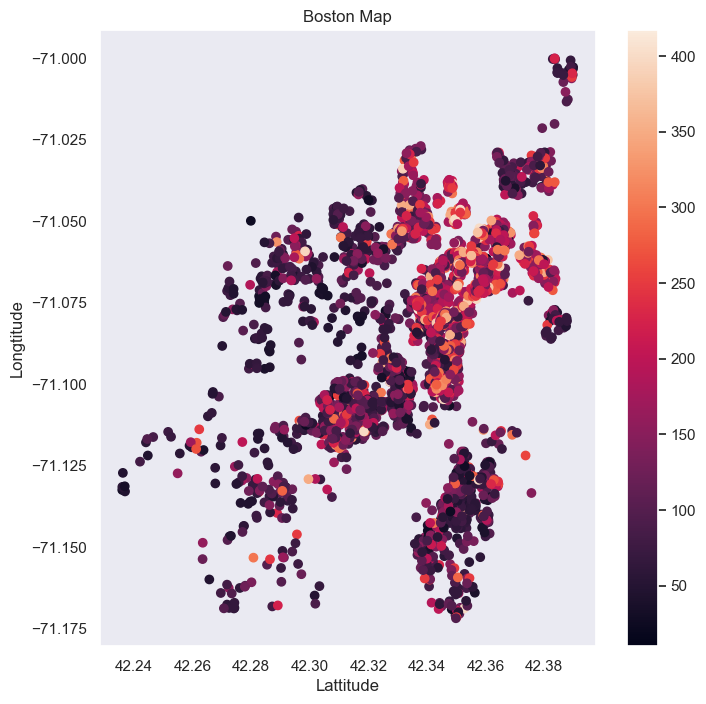

In [34]:
# Let's see the geographic distribution of homestays and colored by price
plt.figure(figsize= (8,8))
plt.scatter(df_no_outliers['latitude'] , df_no_outliers['longitude'] , c=df_no_outliers['price'] )
plt.colorbar()
plt.xlabel("Lattitude")
plt.ylabel("Longtitude")
plt.title("Boston Map")

# if you want to save the figure
plt.savefig('plots/scatter_plot_by_princig.png', transparent=False, bbox_inches='tight')

plt.show()

In [35]:
#creating DataFrame for neighbourhood
neighbourhood_count_price = pd.DataFrame(df_no_outliers.groupby('neighbourhood_cleansed')['price'].count())
neighbourhood_mean_price = pd.DataFrame(df_no_outliers.groupby('neighbourhood_cleansed')['price'].mean().round(2))
neighbourhood_quartiles = df_lis_ans.groupby('neighbourhood_cleansed')['price'].describe()[['min','25%', '50%', '75%','max']]

neighbourhood_inf_price = neighbourhood_mean_price.merge(neighbourhood_count_price,left_index=True,right_index=True).sort_values(by='price_x',ascending=False)
neighbourhood_inf_price = neighbourhood_inf_price.merge(neighbourhood_quartiles,left_index=True,right_index=True)

#Change the name of columns and print table
neighbourhood_inf_price.rename(columns={'price_x':'Mean (Without Outliers)','price_y':'Count (Without Outliers)'},inplace=True)
neighbourhood_inf_price

,Mean (Without Outliers),Count (Without Outliers),min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,
Leather District,253.60,5,159.0,179.00,245.0,295.00,390.0
South Boston Waterfront,234.26,74,115.0,179.50,245.0,297.00,3000.0
Chinatown,232.35,71,80.0,169.00,219.0,297.50,399.0
Downtown,227.24,166,10.0,159.50,225.0,299.00,600.0
Back Bay,216.50,281,40.0,160.00,209.0,299.00,1250.0
Bay Village,205.47,19,90.0,158.50,206.5,381.25,500.0
West End,204.58,48,60.0,169.00,199.0,249.00,450.0
Beacon Hill,190.55,182,75.0,149.25,195.0,243.25,1345.0
Fenway,189.69,280,30.0,100.75,191.0,279.00,4000.0


#### Analysis:
- Prices tend to vary a lot in some regions such as the Fenway neighborhood where the lowest to highest value can have a difference of $3,970, so its suggested to disregarding outliers here for this analysis.

- When carrying out research, you will notice that **the most expensive regions are close to appealing points of the city such as the center, tourist attractions and the airport and the coast**, while the cheapest regions have opposite characteristics.

- The most expensive regions in the city, on average, are the Leather District, South Boston Waterfront and Chinatown.

- The cheapest regions in the city, on average, are Dorchester, Hyde Park and Mattapan

## 3.Which characteristics are most related to the price of the place?

In [36]:
#Copy DataFrame with no outliers
df_model_cor = df_no_outliers.copy()

In [37]:
#drop object (we won't consider them for this project)
for col in df_model_cor.columns:
    if (df_model_cor[col].dtype == 'object'):
        df_model_cor.drop(col, axis=1, inplace=True)

In [38]:
#change host_since column data (we need to have all columns as numeric)
#Rows will show the difference in days between each date and the earliest recorded date
most_recent_date = df_model_cor['host_since'].max()
df_model_cor['host_since'] = (most_recent_date - df_model_cor['host_since']).dt.days 

In [39]:
#Check correlation
correlation_matrix = df_model_cor.corr()
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
price_correlations = price_correlations.drop('price')  # remove the 'price' from the series

# Calculate correlations
df_corr_features = df_model_cor.drop('price', axis=1).corrwith(df_model_cor['price']).sort_values()

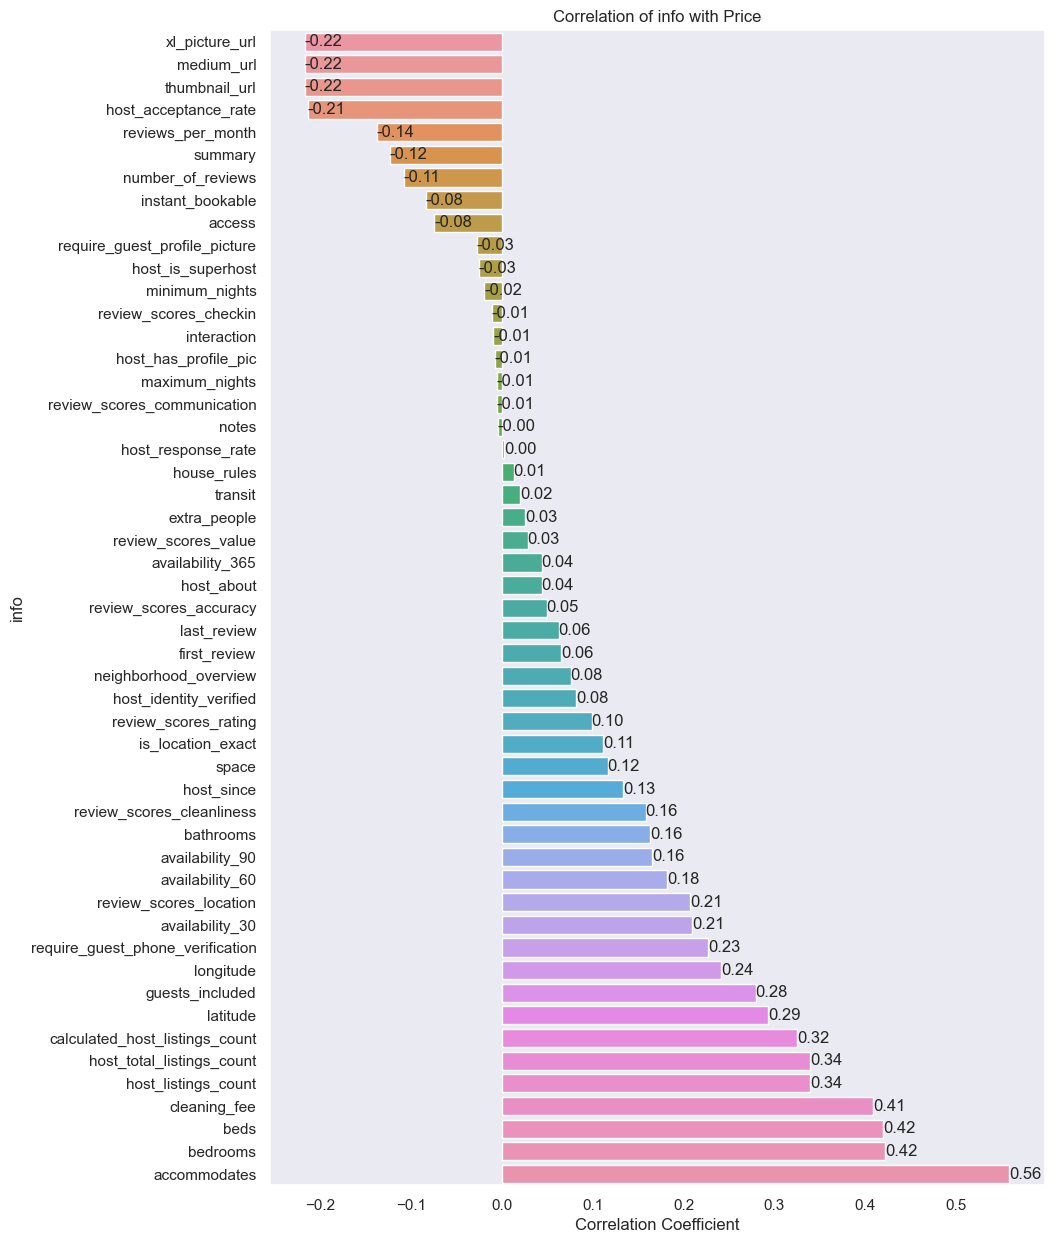

In [40]:
# Plot
plt.figure(figsize=(10, 15))  # Increased figure size for better readability
sns.barplot(x=df_corr_features.values, y=df_corr_features.index)
plt.title('Correlation of info with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('info')

# Annotate each bar with its corresponding proportion
for index, value in enumerate(df_corr_features.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')  # Adjusted text position

# if you want to save the figure
plt.savefig('plots/bar_chart_correlation_info_with_price.png', transparent=False, bbox_inches='tight')

plt.show()

In [41]:
df_corr_features[(abs(df_corr_features)>0.24)].sort_values()

longitude                         0.241621
guests_included                   0.279143
latitude                          0.292699
calculated_host_listings_count    0.324905
host_total_listings_count         0.339214
host_listings_count               0.339214
cleaning_fee                      0.409036
beds                              0.419986
bedrooms                          0.421893
accommodates                      0.558855
dtype: float64

#### Analysis:

- Considering the caracteristics of homestays, if you wnat to increase the price, you should consider:
    - **Location**: Places further northwest tend to be more expensive due to higher demand and proximity to attractions.
    - **Capacity**: **If you have an extra room, put a bed in it!** Larger properties (more beds, bedrooms, and guests included) generally have higher prices. The number of bathrooms doesn't affect the price.
    - **Cleaning Fee**: Higher cleaning fees usually mean higher overall prices, reflecting better quality or larger properties.
    - **Host Experience**: Hosts with more listings often charge higher prices, possibly due to their professional or commercial approach.

---